# Red Wine Quality Prediction Project

In [1]:
import pandas as pd

# URL of the CSV file
url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv"

# Load the CSV file into a DataFrame
wine_data = pd.read_csv(url)

# Display the DataFrame
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


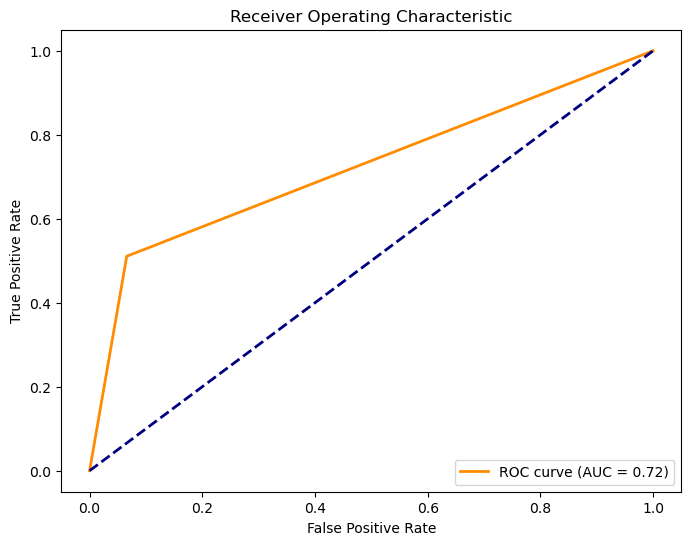

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

# Load the dataset
url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv"
wine_data = pd.read_csv(url)

# Check for missing values
print(wine_data.isnull().sum())

# Encode the target variable: wines with quality >= 7 as 'good' (1), else 'not good' (0)
wine_data['quality_label'] = wine_data['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Split the data into features and target
X = wine_data.drop(['quality', 'quality_label'], axis=1)
y = wine_data['quality_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities
y_prob = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}


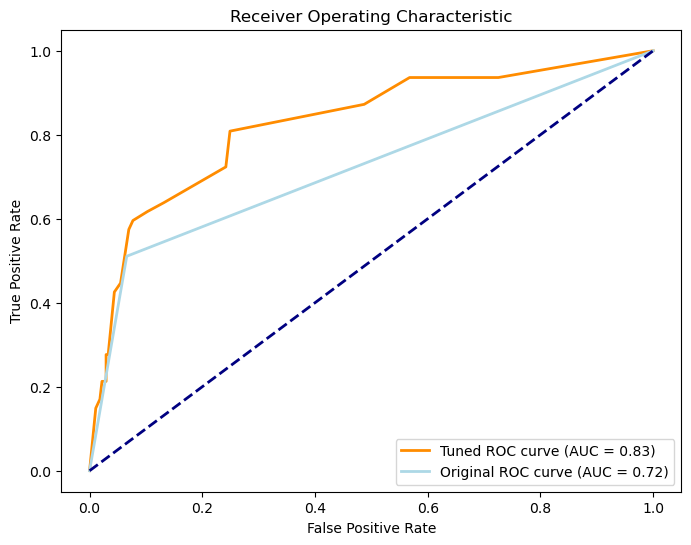

Selected Features: Index(['volatile acidity', 'free sulfur dioxide', 'total sulfur dioxide',
       'sulphates', 'alcohol'],
      dtype='object')


In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

# Define the range of hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the decision tree classifier with the best hyperparameters
best_clf = DecisionTreeClassifier(random_state=42, **best_params)
best_clf.fit(X_train, y_train)

# Predict probabilities
y_prob_best = best_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for the tuned model
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_prob_best)
roc_auc_best = auc(fpr_best, tpr_best)

# Plot ROC curve for the tuned model
plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label='Tuned ROC curve (AUC = %0.2f)' % roc_auc_best)
plt.plot(fpr, tpr, color='lightblue', lw=2, label='Original ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Feature selection using Recursive Feature Elimination (RFE)
rfe = RFE(estimator=best_clf, n_features_to_select=5, step=1)
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)


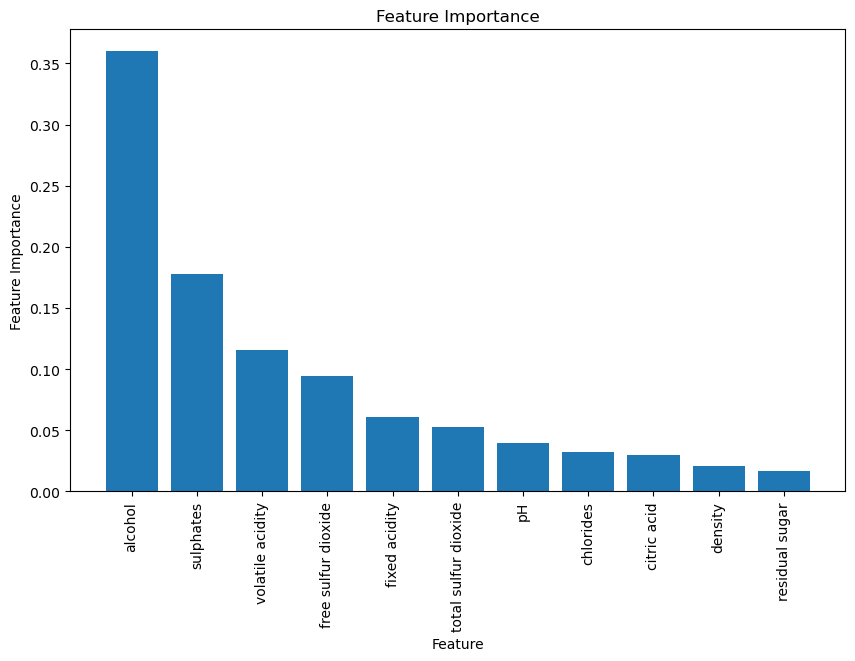

The best hyperparameters for the decision tree classifier are: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
The selected features for the model are: Index(['volatile acidity', 'free sulfur dioxide', 'total sulfur dioxide',
       'sulphates', 'alcohol'],
      dtype='object')
The AUC score of the tuned model is 0.83, while the AUC score of the original model is 0.72.
Based on the feature importance plot, it seems that alcohol content is the most important feature in predicting wine quality.
Further refinement of the model could involve experimenting with different algorithms and feature engineering techniques.


In [4]:
# Plot feature importance
feature_importance = best_clf.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importance[sorted_idx], align="center")
plt.xticks(range(X.shape[1]), X.columns[sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Feature Importance")
plt.show()

# Conclusion
print("The best hyperparameters for the decision tree classifier are:", best_params)
print("The selected features for the model are:", selected_features)
print("The AUC score of the tuned model is {:.2f}, while the AUC score of the original model is {:.2f}.".format(roc_auc_best, roc_auc))
print("Based on the feature importance plot, it seems that alcohol content is the most important feature in predicting wine quality.")
print("Further refinement of the model could involve experimenting with different algorithms and feature engineering techniques.")


# Medical Cost Personal Insurance Project

In [5]:
import pandas as pd

# URL of the CSV file
url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv"

# Load the CSV file into a DataFrame
insurance_data = pd.read_csv(url)

# Display the DataFrame
insurance_data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
# Check for missing values
print(insurance_data.isnull().sum())


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


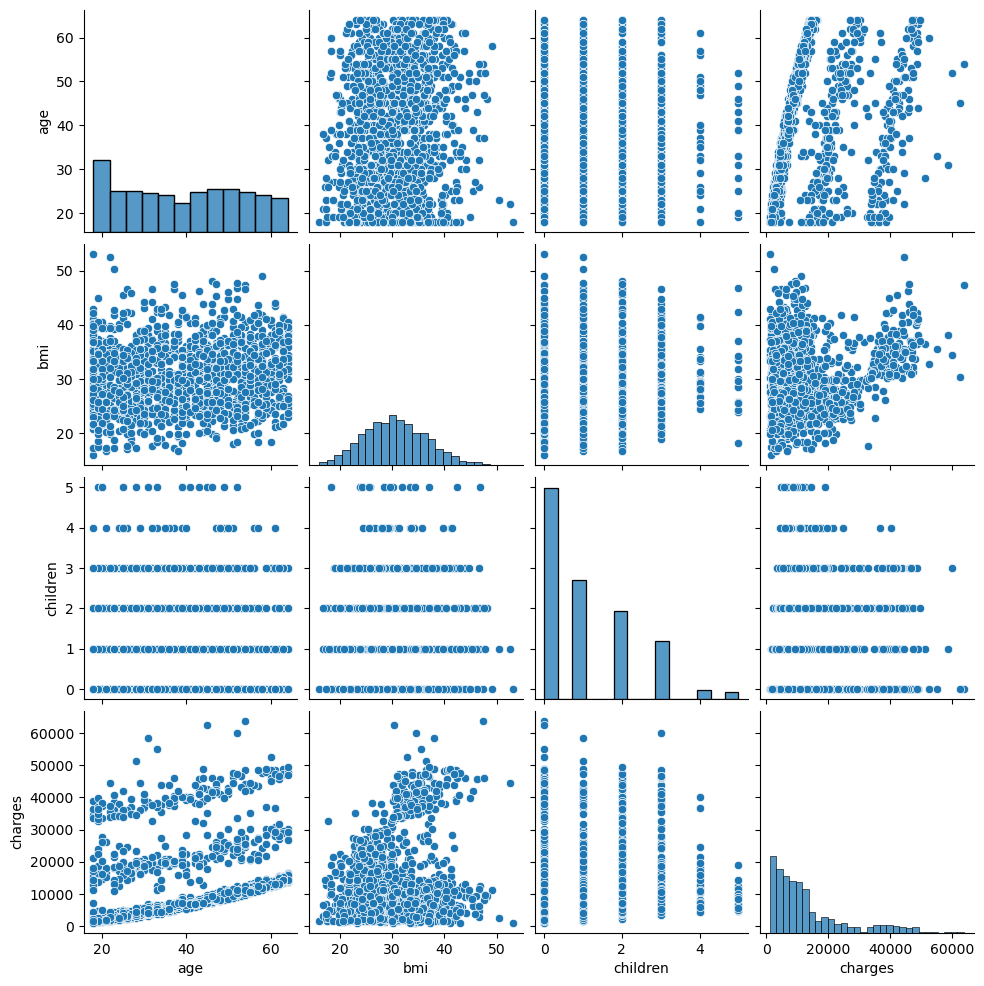

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of numerical features
numerical_features = ['age', 'bmi', 'children', 'charges']
sns.pairplot(insurance_data[numerical_features])
plt.show()


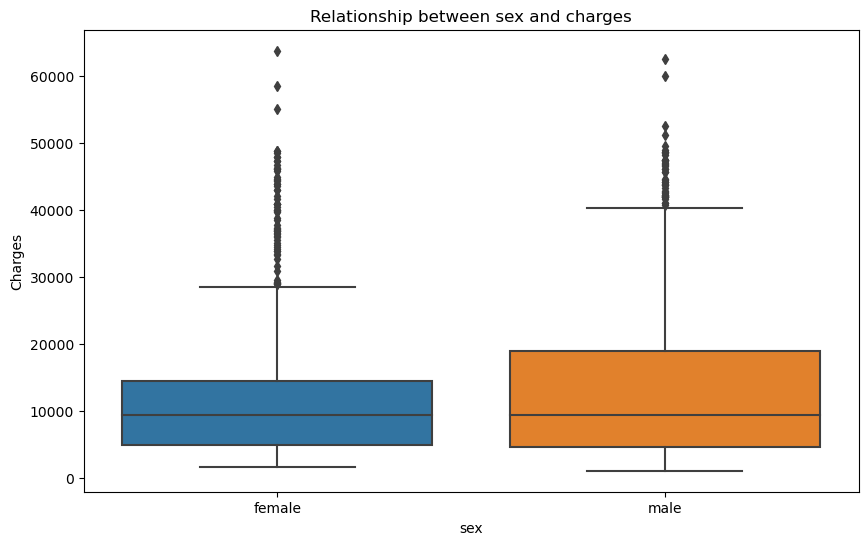

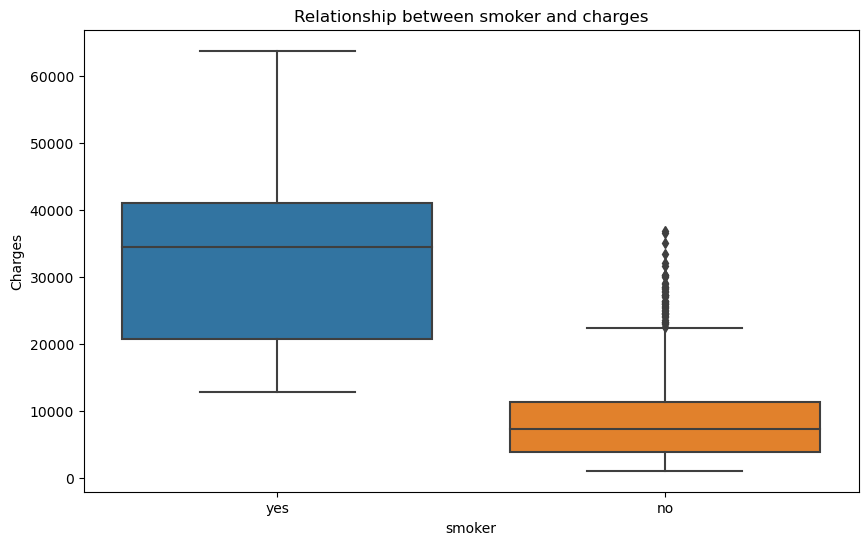

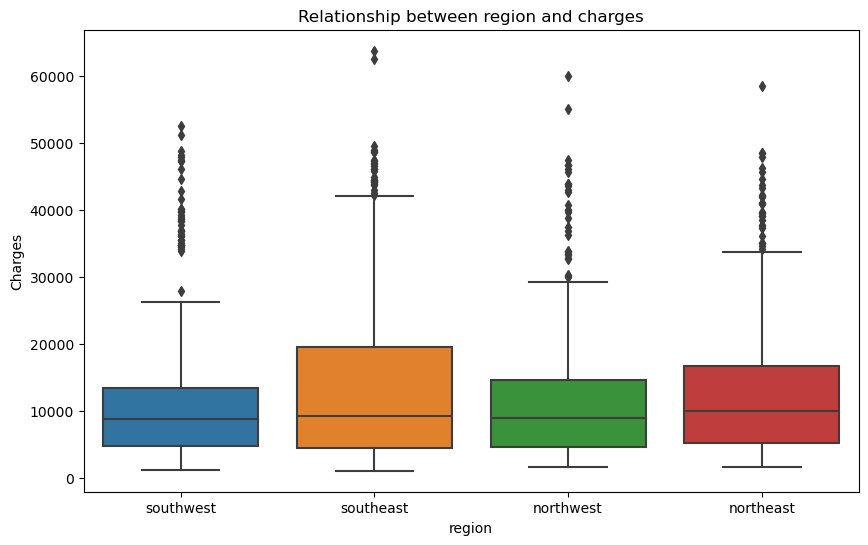

In [8]:
# Visualize the relationship between categorical features and charges
categorical_features = ['sex', 'smoker', 'region']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='charges', data=insurance_data)
    plt.title(f'Relationship between {feature} and charges')
    plt.xlabel(feature)
    plt.ylabel('Charges')
    plt.show()


In [10]:
from sklearn.model_selection import train_test_split

# Preprocess categorical variables (if needed)
# One-hot encode categorical variables
insurance_data = pd.get_dummies(insurance_data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Split the dataset into features (X) and target variable (y)
X = insurance_data.drop('charges', axis=1)
y = insurance_data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


KeyError: "None of [Index(['sex', 'smoker', 'region'], dtype='object')] are in the [columns]"

In [11]:
# Check the columns in the DataFrame
print(insurance_data.columns)


Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')


In [12]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = insurance_data.drop('charges', axis=1)
y = insurance_data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1070, 8)
Shape of X_test: (268, 8)
Shape of y_train: (1070,)
Shape of y_test: (268,)


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Absolute Error: 2550.0784706115096
Mean Squared Error: 20942520.922619622
R-squared Score: 0.8651034329144947


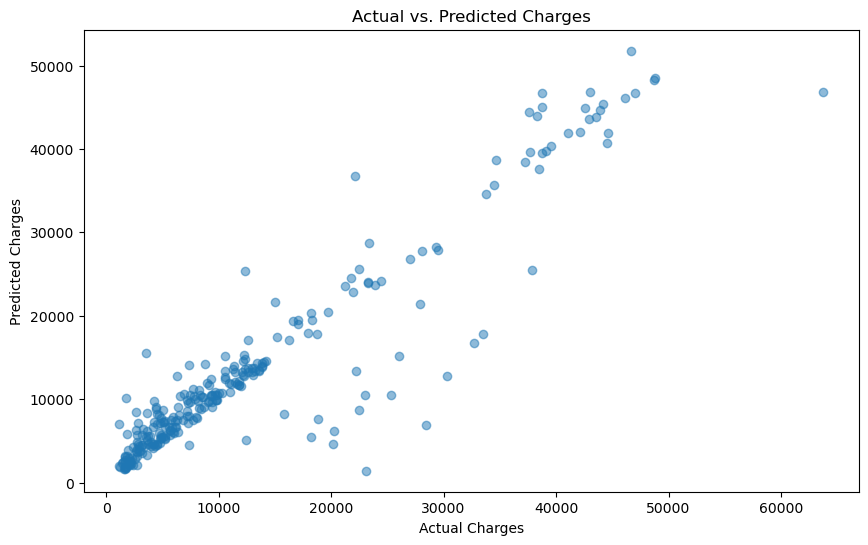

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges")
plt.show()
